## IMPORT PYTHON MODULES

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

## IMPORT AND VALIDATE DATA 

In [3]:
warnings.filterwarnings("ignore")

#import data
data = r'final_dataset.csv'
cp = pd.read_csv(data)

cp.head()

,Unnamed: 0,user_pseudo_id,medium_path,conversion_flag,first_touchpoint,conversion_timestamp,step1,step2,step3,step4,step5,step6,step7,step8,step9,step10,step11,step12,step13
0,4,nP78ikNKi2iu1IJUO+LWIPcoByh3ZWFvlIzIl174i1jCuK...,paidsocial,0,2022-12-28 00:00:52.722434+00:00,NaN,paidsocial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,Kkx/yH2k8X5rWdx+wG7DPuxpEyCsvSNwDqr4BzWGpxQw38...,cpc,0,2022-12-28 00:01:01.875587+00:00,NaN,cpc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,brAeKj/gaKj8RkzQBIJfe/5XDKShTLwOcTh6yXQink4Kuo...,organic,0,2022-12-28 00:01:15.005975+00:00,NaN,organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,4i0jYrhlk2CNR94hRIat8WPFLkU8dRdcPgKA1oDlwsWbUe...,cpc,0,2022-12-28 00:02:08.431349+00:00,NaN,cpc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,JDClr9MBvuQkNi/PeCvCFScJ0NL/3qIlq0ZWVYzoGSbsNC...,paidsocial,0,2022-12-28 00:02:24.791342+00:00,NaN,paidsocial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71009 entries, 0 to 71008
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            71009 non-null  int64 
 1   user_pseudo_id        71009 non-null  object
 2   medium_path           71009 non-null  object
 3   conversion_flag       71009 non-null  int64 
 4   first_touchpoint      71009 non-null  object
 5   conversion_timestamp  3489 non-null   object
 6   step1                 71009 non-null  object
 7   step2                 13645 non-null  object
 8   step3                 6428 non-null   object
 9   step4                 3758 non-null   object
 10  step5                 2454 non-null   object
 11  step6                 1712 non-null   object
 12  step7                 1305 non-null   object
 13  step8                 1016 non-null   object
 14  step9                 812 non-null    object
 15  step10                677 non-null  

# DATA ANALYSIS 

In [12]:
converted_users = cp[cp['conversion_flag'] == 1]

expanded_paths_conv_user = converted_users['medium_path'].str.split(',', expand=True)

not_converted_users = cp[cp['conversion_flag'] == 0]

expanded_paths_non_conv_user = not_converted_users['medium_path'].str.split(',', expand=True)


## Path Length Analysis for Converted Users:

In [151]:
# Calculate path lengths
path_lengths = expanded_paths_conv_user.count(axis=1)

total_num_of_path_length = path_lengths.count()

percent = path_lengths.value_counts() / total_num_of_path_length * 100

# Create a DataFrame for path length analysis
path_length_analysis = pd.DataFrame({
    'Path Length': path_lengths.value_counts(),
    'total of %': percent
})

# Calculate the average path length
average_path_length = path_length_analysis['Path Length'].mean()

# Print the distribution of path lengths
print("Distribution of Path Lengths:")
print(path_length_analysis.head(30))


Distribution of Path Lengths:
    Path Length  total of %
1          2245   64.345085
2           581   16.652336
3           269    7.709946
4           131    3.754657
5            76    2.178275
6            59    1.691029
7            30    0.859845
8            21    0.601892
10           15    0.429923
9            14    0.401261
13            8    0.229292
11            6    0.171969
15            6    0.171969
12            5    0.143308
19            4    0.114646
21            2    0.057323
17            2    0.057323
42            2    0.057323
16            1    0.028662
22            1    0.028662
23            1    0.028662
33            1    0.028662
27            1    0.028662
28            1    0.028662
74            1    0.028662
34            1    0.028662
25            1    0.028662
18            1    0.028662
29            1    0.028662
20            1    0.028662


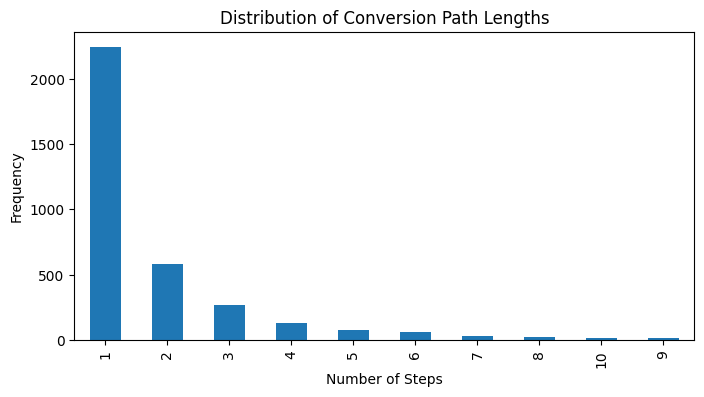

In [152]:
# Plot the frequency of 'paidsocial' in different steps
plt.figure(figsize=(8, 4))
path_length_analysis['Path Length'].head(10).plot(kind='bar')
plt.title("Distribution of Conversion Path Lengths")
plt.xlabel("Number of Steps")
plt.ylabel("Frequency")
plt.show()

In [14]:
# Calculate the cumulative sum of the "total of %" column
path_length_analysis['cumulative %'] = path_length_analysis['total of %'].cumsum()

# Filter the DataFrame to include rows where the cumulative sum is less than or equal to 95%
filtered_df = path_length_analysis[path_length_analysis['cumulative %'] <= 99]

filtered_df

,Path Length,total of %,cumulative %
1,2245,64.345085,64.345085
2,581,16.652336,80.997420
3,269,7.709946,88.707366
4,131,3.754657,92.462024
5,76,2.178275,94.640298
6,59,1.691029,96.331327
7,30,0.859845,97.191172
8,21,0.601892,97.793064
10,15,0.429923,98.222987
9,14,0.401261,98.624248


## One-Step Conversions by Channel

In [20]:
converted_users = expanded_data[expanded_data['conversion_flag'] == 1]

one_step_counts = converted_users[(converted_users['step2'].isnull())]['step1'].value_counts()

# Calculate the total number of conversions
total_conversions = one_step_counts.sum()

# Calculate percentages for each channel
percentages = (one_step_counts / total_conversions) * 100

one_step_conversions = pd.DataFrame({
    'Conversions': one_step_counts,
    '% of total': percentages
})

print(one_step_conversions)

             Conversions  % of total
organic              622   27.706013
cpc                  607   27.037862
email                595   26.503341
affiliates           205    9.131403
referral             106    4.721604
paidsocial            77    3.429844
gotoweb               31    1.380846
chumba_post            2    0.089087


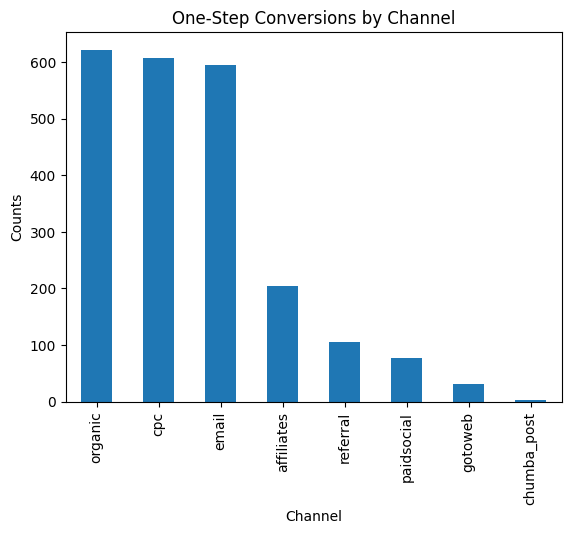

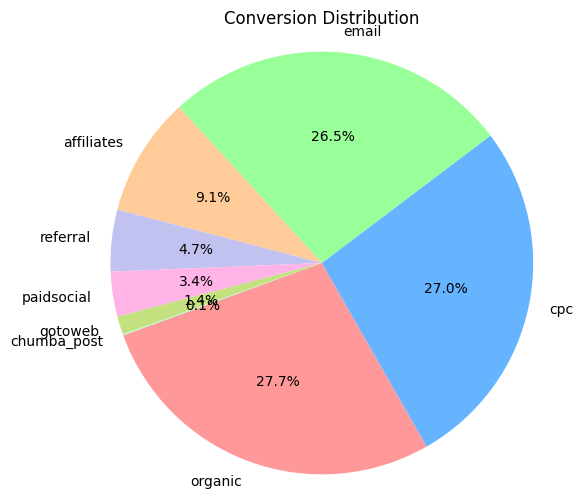

In [45]:
one_step_counts.plot(kind='bar', stacked=True)
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("One-Step Conversions by Channel")
plt.show()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#aaffc3']
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=200, colors=colors)
plt.title('Conversion Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



## Conversion Rates per Channel

### First click attribution

#### Conversion Distribution

In [58]:
total_impressions = cp['step1'].value_counts()

# Count occurrences of each medium path step (first step)
first_step_counts = converted_users['step1'].value_counts()

total_conversions = len(converted_users)

In [59]:
conversion_distibution = first_step_counts / total_conversions * 100

first_click_attribution = pd.DataFrame({
    'Traffic Source': first_step_counts.index,
    'Conversions': first_step_counts,
    'Conversion Distribution(%)': conversion_distibution
})

print(first_click_attribution.sort_values(by='Conversion Distribution(%)', ascending=False))

                  Traffic Source  Conversions  Conversion Distribution(%)
organic                  organic          934                   26.769848
cpc                          cpc          899                   25.766695
email                      email          828                   23.731728
affiliates            affiliates          464                   13.298940
referral                referral          181                    5.187733
paidsocial            paidsocial          103                    2.952135
gotoweb                  gotoweb           77                    2.206936
chumba_post          chumba_post            2                    0.057323
company_profile  company_profile            1                    0.028662


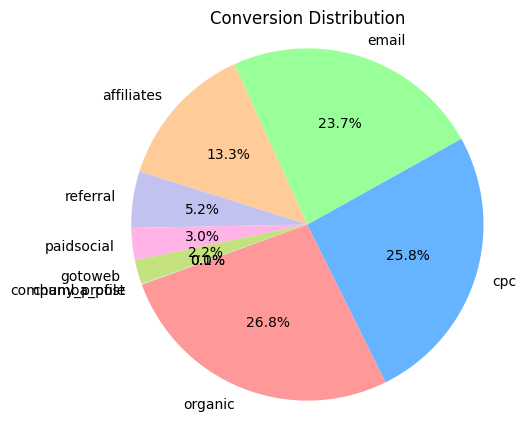

In [160]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#aaffc3']
plt.figure(figsize=(5, 5))
plt.pie(conversion_distibution, labels=conversion_distibution.index, autopct='%1.1f%%', startangle=200, colors=colors)
plt.title('Conversion Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Conversion rate

In [61]:
conversion_rates = (first_step_counts / total_impressions) * 100

conversion_rate_by_source = pd.DataFrame({
    'Conversions': first_step_counts,
    'Clicks': total_impressions,
    'Conversion Rate (%)': conversion_rates
})

print(conversion_rate_by_source.sort_values(by='Conversion Rate (%)', ascending=False))

                 Conversions  Clicks  Conversion Rate (%)
company_profile          1.0       6            16.666667
gotoweb                 77.0     749            10.280374
organic                934.0    9187            10.166540
email                  828.0   10919             7.583112
chumba_post              2.0      30             6.666667
affiliates             464.0    7064             6.568516
cpc                    899.0   14388             6.248262
referral               181.0    7119             2.542492
paidsocial             103.0   21542             0.478136
affili                   NaN       1                  NaN
influencer               NaN       3                  NaN
undefined                NaN       1                  NaN


Lets also check last click attribution model

## Last click attribution

#### Conversion Distribution

paidsocial works bad for both attribution models let's check how offen users come from this ftaffic shoursce 

In [162]:
cp['medium_steps'] = cp['medium_path'].str.split(',')

df = data_filtered.explode('medium_steps')

extract_last_step = cp['medium_steps'].apply(lambda x: x[-1] if isinstance(x, list) else None)
cp['last_step'] = extract_last_step

In [163]:
total_impressions_last_click = cp['last_step'].value_counts()

converted_users_last_click = cp[cp['conversion_flag'] == 1]

total_conversions_last_click = len(converted_users_last_click)

# Count occurrences of each medium path step (last step)
last_step_counts_last_click = converted_users_last_click['last_step'].value_counts()

conversion_distribution = last_step_counts_last_click / total_conversions_last_click * 100

conversion_distribution_by_source = pd.DataFrame({
    'Conversions': last_step_counts_last_click,
    'Conversion Distribution (%)': conversion_distribution,
})

print(conversion_distribution_by_source)

                 Conversions  Conversion Distribution (%)
organic                  985                    28.231585
email                    933                    26.741187
cpc                      747                    21.410146
affiliates               414                    11.865864
referral                 213                     6.104901
gotoweb                  101                     2.894812
paidsocial                93                     2.665520
chumba_post                2                     0.057323
company_profile            1                     0.028662


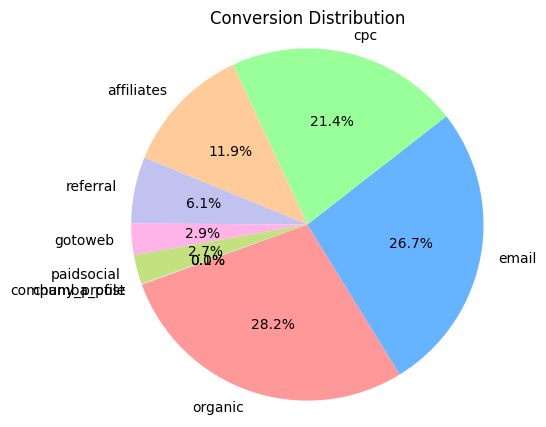

In [166]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#aaffc3']
plt.figure(figsize=(5, 5))
plt.pie(conversion_distribution, labels=conversion_distribution.index, autopct='%1.1f%%', startangle=200, colors=colors)
plt.title('Conversion Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Conversion rate

In [76]:
# Calculate conversion rates for each traffic source
conversion_rates = (last_step_counts_last_click / total_impressions_last_click) * 100

conversion_rate_by_source = pd.DataFrame({
    'Conversions': last_step_counts_last_click,
    'Clicks': total_impressions_last_click,
    'Conversion Rate (%)': conversion_rates
})

#print(conversion_rate_by_source)
# Print the conversion rates by traffic source
print(conversion_rate_by_source.sort_values(by='Conversion Rate (%)', ascending=False))

                 Conversions  Clicks  Conversion Rate (%)
company_profile          1.0       5            20.000000
gotoweb                101.0     844            11.966825
organic                985.0    9391            10.488766
email                  933.0   11758             7.935023
affiliates             414.0    6966             5.943152
cpc                    747.0   13340             5.599700
chumba_post              2.0      37             5.405405
referral               213.0    7329             2.906263
paidsocial              93.0   21332             0.435965
a                        NaN       1                  NaN
affili                   NaN       1                  NaN
influencer               NaN       4                  NaN
undefined                NaN       1                  NaN


## Paidsocial analysis

In [80]:
# Ensure all steps are exploded into separate rows
cp['medium_steps'] = cp['medium_path'].str.split(',')
df = cp.explode('medium_steps')
paidsocial_data = df[df['medium_steps'] == 'paidsocial']

In [81]:
# Frequency of "paidsocial" in different steps
step_counts = paidsocial_data.groupby('user_pseudo_id').cumcount() + 1
step_frequency = step_counts.value_counts().sort_index()
print("Frequency of 'paidsocial' in different steps:\n", step_frequency)

Frequency of 'paidsocial' in different steps:
 1     21603
2       890
3       195
4        80
5        37
6        22
7        13
8        10
9         9
10        7
11        5
12        4
13        4
14        4
15        4
16        4
17        4
18        4
19        4
20        2
21        2
22        2
23        1
24        1
25        1
26        1
27        1
28        1
29        1
30        1
31        1
32        1
33        1
34        1
35        1
36        1
37        1
38        1
39        1
dtype: int64


In [102]:
# Common paths involving "paidsocial"
common_paths_with_paidsocial = paidsocial_users['medium_path'].value_counts()
print("Common paths involving 'paidsocial':\n", common_paths_with_paidsocial.head(10))

Common paths involving 'paidsocial':
 paidsocial                                                20427
paidsocial,paidsocial                                       654
paidsocial,referral                                         162
paidsocial,paidsocial,paidsocial                            109
paidsocial,paidsocial,paidsocial,paidsocial                  39
referral,paidsocial                                          30
paidsocial,email                                             30
paidsocial,paidsocial,paidsocial,paidsocial,paidsocial       15
paidsocial,referral,referral                                 12
paidsocial,paidsocial,referral                               10
Name: medium_path, dtype: int64


In [94]:
# Common conversion paths involving "paidsocial"
conersion_paidsocial_data = paidsocial_data[paidsocial_data['conversion_flag'] == 1]
common_paths_with_paidsocial = paidsocial_users['medium_path'].value_counts().head(10)

common_paths_with_paidsocial = conersion_paidsocial_data['medium_path'].value_counts().head(10)
print("Common conversion paths involving 'paidsocial':\n", common_paths_with_paidsocial)

Common conversion paths involving 'paidsocial':
 paidsocial                                                                                 77
paidsocial,paidsocial                                                                      20
paidsocial,paidsocial,paidsocial                                                            9
paidsocial,paidsocial,paidsocial,paidsocial,paidsocial,paidsocial,paidsocial,paidsocial     8
paidsocial,referral                                                                         4
paidsocial,email                                                                            3
paidsocial,paidsocial,paidsocial,email                                                      3
paidsocial,paidsocial,email                                                                 2
affiliates,affiliates,affiliates,paidsocial,paidsocial                                      2
referral,paidsocial,paidsocial                                                              2
Name: mediu

In [82]:
# Conversion rate when "paidsocial" is involved
paidsocial_users = data_filtered[data_filtered['medium_steps'].apply(lambda steps: 'paidsocial' in steps if isinstance(steps, list) else False)]
paidsocial_conversion_rate = paidsocial_users['conversion_flag'].mean() * 100
print(f"Conversion rate for paths involving 'paidsocial': {paidsocial_conversion_rate:.2f}%")


Conversion rate for paths involving 'paidsocial': 0.49%


In [95]:
# Time to conversion with "paidsocial" involvement
paidsocial_conversions = paidsocial_users[paidsocial_users['conversion_flag'] == 1]
paidsocial_conversions['time_to_conversion'] = paidsocial_conversions['conversion_timestamp'] - paidsocial_conversions['first_touchpoint']
time_to_conversion_stats = paidsocial_conversions['time_to_conversion'].describe()
print("Time to Conversion Stats for 'paidsocial' involvement:\n", time_to_conversion_stats)

Time to Conversion Stats for 'paidsocial' involvement:
 count                          105
mean     1 days 08:41:40.688059571
std      3 days 12:28:07.984160324
min         0 days 00:01:06.409843
25%         0 days 00:05:25.356120
50%         0 days 00:20:41.462337
75%         1 days 00:19:33.948472
max        19 days 23:26:49.756792
Name: time_to_conversion, dtype: object


In [168]:
# Conversion rate'
conversion_counts = paidsocial_users.groupby('medium_path')['conversion_flag'].sum().loc[common_paths_with_paidsocial.index]
conversion_rates = (conversion_counts / common_paths_with_paidsocial) * 100

common_paths_analysis = pd.DataFrame({
    'Path': common_paths_with_paidsocial.index,
    'Clicks': common_paths_with_paidsocial.values,
    'Conversions': conversion_counts.values,
    'Conversion Rate (%)': conversion_rates.values
})

print("Common paths involving 'paidsocial' with conversions and conversion rates:\n", common_paths_analysis.head(10))


Common paths involving 'paidsocial' with conversions and conversion rates:
                                                 Path  Clicks  Conversions  \
0                                         paidsocial   20427           77   
1                              paidsocial,paidsocial     654           10   
2                                paidsocial,referral     162            4   
3                   paidsocial,paidsocial,paidsocial     109            3   
4        paidsocial,paidsocial,paidsocial,paidsocial      39            0   
5                                referral,paidsocial      30            0   
6                                   paidsocial,email      30            3   
7  paidsocial,paidsocial,paidsocial,paidsocial,pa...      15            0   
8                       paidsocial,referral,referral      12            0   
9                     paidsocial,paidsocial,referral      10            0   

   Conversion Rate (%)  
0             0.376952  
1             1.529052  
2

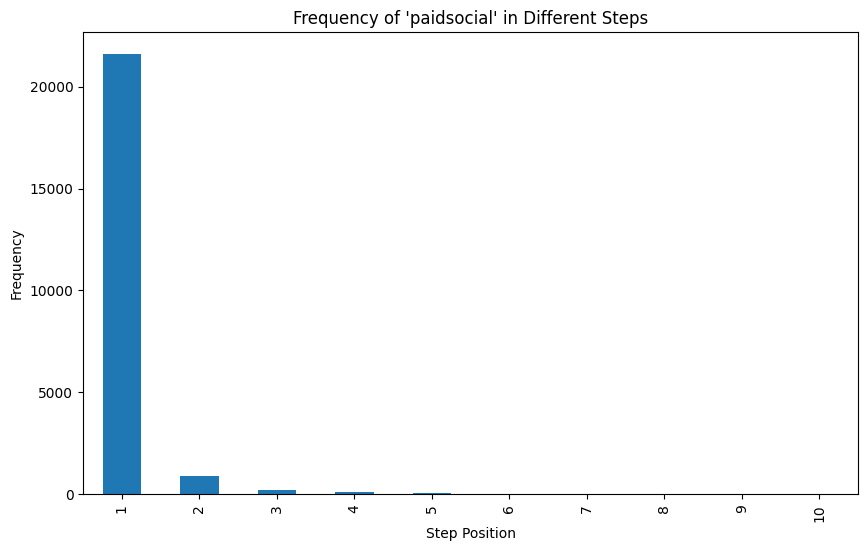

In [171]:
# Plot the frequency of 'paidsocial' in different steps
plt.figure(figsize=(10, 6))
step_frequency.head(10).plot(kind='bar')
plt.title("Frequency of 'paidsocial' in Different Steps")
plt.xlabel("Step Position")
plt.ylabel("Frequency")
plt.show()

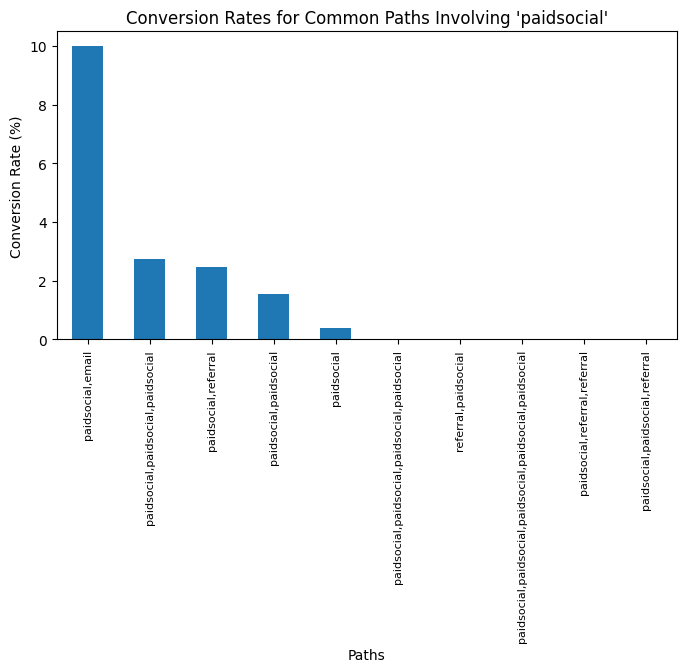

In [186]:
# Plot conversion rates for common paths involving 'paidsocial'
plt.figure(figsize=(8, 4))
sorted_common_paths_analysis= common_paths_analysis.head(10).sort_values(by='Conversion Rate (%)', ascending=False)

sorted_common_paths_analysis.set_index('Path')['Conversion Rate (%)'].plot(kind='bar')
plt.title("Conversion Rates for Common Paths Involving 'paidsocial'")
plt.xlabel("Paths")
plt.ylabel("Conversion Rate (%)")
plt.xticks(fontsize=8)
import matplotlib.pyplot as plt

plt.show()

## Common Conversion Path 

In [132]:
common_conversion_paths = cp[cp['conversion_flag'] == 1]['medium_path'].value_counts()
common_conversion_paths.head(30)

organic                                        622
cpc                                            607
email                                          595
affiliates                                     205
email,email                                    110
referral                                       106
organic,organic                                 79
paidsocial                                      77
affiliates,affiliates                           76
cpc,cpc                                         57
organic,organic,organic                         49
cpc,email                                       47
gotoweb                                         31
email,email,email                               29
cpc,cpc,cpc                                     28
affiliates,affiliates,affiliates                24
organic,affiliates                              24
organic,email                                   22
cpc,organic                                     20
referral,referral              

## Path Length Analysis for non converted users:

In [170]:
# Calculate path lengths
path_lengths = expanded_paths_non_conv_user.count(axis=1)

total_num_of_path_length = path_lengths.count()

percent = path_lengths.value_counts() / total_num_of_path_length * 100

path_length_analysis = pd.DataFrame({
    'Path Length': path_lengths.value_counts(),
    'total of %': percent
})

average_path_length = path_length_analysis['Path Length'].mean()

print("Distribution of Path Lengths:")
print(path_length_analysis.head(30))


Distribution of Path Lengths:
    Path Length  total of %
1         55119   81.633590
2          6636    9.828199
3          2401    3.555983
4          1173    1.737263
5           666    0.986374
6           348    0.515403
7           259    0.383590
8           183    0.271031
9           121    0.179206
10           97    0.143661
11           71    0.105154
12           57    0.084419
13           43    0.063685
14           35    0.051836
15           33    0.048874
20           27    0.039988
19           26    0.038507
17           25    0.037026
18           22    0.032583
16           21    0.031102
21           15    0.022216
24           15    0.022216
26           14    0.020735
25           12    0.017773
23           12    0.017773
22           12    0.017773
29            9    0.013329
27            7    0.010367
28            5    0.007405
35            4    0.005924


## Time to Conversion

In [169]:
df['time_to_conversion'] = cp['conversion_timestamp'] - cp['first_touchpoint']

time_to_conversion_stats = df[df['conversion_flag'] == 1]['time_to_conversion'].describe()
print("Time to Conversion Stats:\n", time_to_conversion_stats)


Time to Conversion Stats:
 count                         7045
mean     4 days 21:35:42.254124371
std      6 days 01:30:14.053243946
min         0 days 00:00:00.003316
25%         0 days 04:55:17.367576
50%         2 days 10:00:52.031592
75%         7 days 02:07:31.002956
max        27 days 14:48:07.306419
Name: time_to_conversion, dtype: object
